In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/')

In [ ]:
!pip install osmnx==0.16.2

In [ ]:
#Import libraries
import osmnx as ox
import networkx as nx
import queue
import math
import priority_dict

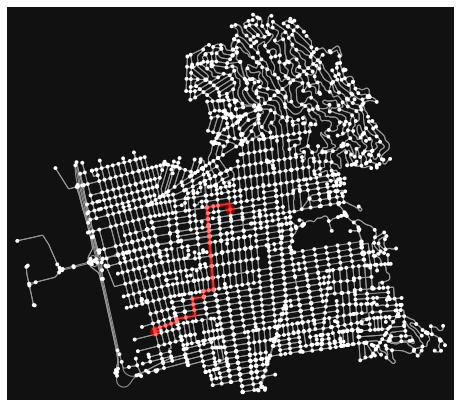

In [ ]:
#Plot the shortest path using the library
map_graph = ox.graph_from_place('Berkeley, California', network_type='drive')
origin = ox.get_nearest_node(map_graph, (37.8743, -122.277))
destination = list(map_graph.nodes())[-1]
shortest_path = nx.shortest_path(map_graph, origin, destination, weight='length')
fig, ax = ox.plot_graph_route(map_graph, shortest_path)

In [ ]:
def heuristic_dist(state_key, goal_key, node_data):
    n1 = node_data[state_key]
    n2 = node_data[goal_key]

    # Get the longitude and latitude for each vertex.
    long1 = n1['x']*math.pi/180.0
    lat1 = n1['y']*math.pi/180.0
    long2 = n2['x']*math.pi/180.0
    lat2 = n2['y']*math.pi/180.0
    
    # Use a spherical approximation of the earth for
    # estimating the distance between two points.
    r = 6371000
    x1 = r*math.cos(lat1)*math.cos(long1)
    y1 = r*math.cos(lat1)*math.sin(long1)
    z1 = r*math.sin(lat1)

    x2 = r*math.cos(lat2)*math.cos(long2)
    y2 = r*math.cos(lat2)*math.sin(long2)
    z2 = r*math.sin(lat2)

    d = ((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)**0.5
    
    return d  


In [ ]:
def Astar_alg(origin_node,goal_node,graph):
    open = priority_dict.priority_dict({})
    
    #Dictionary containing the closed nodes
    closed_dict = {}
    
    # The dictionary containing predecessors for each vertex.
    predecessors = {}
    
    # The dictionary that stores the best cost to reach each
    # vertex found so far.
    costs = {}
    
    # Get the spatial data for each vertex as a dictionary.
    node_data = graph.nodes(True)
    
    # Add the origin to the open queue and the costs dictionary.
    costs[origin_node] = 0.0
    open[origin_node] = heuristic_dist(origin_node, goal_node, node_data)
    goal_found = False
    while (open):
        i, _ = open.pop_smallest()
        i_cost = costs[i]
        if i == goal_node:
            return path_generator(origin_node, goal_node, predecessors)
        for edge in graph.out_edges([i], data=True):
            j = edge[1]
            if j in closed_dict:
                continue
            ij_cost = edge[2]['length']
            #cost = i_cost + ij_cost
            total_cost = i_cost + ij_cost+heuristic_dist(j, goal_node, node_data)
            if j in open:
                if total_cost < open_queue[v]:
                    open[i] = total_cost
                    costs[j] = i_cost + ij_cost
                    predecessors[j] = i
            else:
                open[j] = total_cost
                costs[j] = i_cost + ij_cost
                predecessors[j] = i
        closed_dict[i] = i_cost
    
    # If we get through entire priority queue without finding the goal,
    # something is wrong.
    if not goal_found:
        raise ValueError("Goal not found in search.")
    
    # Construct the path from the predecessors dictionary.
    return path_generator(origin_node, goal_node, predecessors)
    '''#priority queue of open nodes which has values associated to it
  open=priority_dict.priority_dict({})
  print("sania")
  #dictionary containing the closed nodes
  closed={}
  #dictionary containing the predecessors of eack node
  predecessors={}
  cost={}
  node_data = graph.nodes(True)
  cost[origin_node]=0.0
  open[origin_node] = heuristic_dist(origin_node, goal_node, node_data)
  goal_reached=False
  while (open):
    print("sania")
    i,_=open.pop_smallest()
    i_cost=cost[i]
    if i == goal_node:
      print("reached")
      goal_reached=True
      break
    for link in graph.out_edges([i],data=True):
      j=link[1]
      ij_cost=link[2]['length']
      total_cost=i_cost+ij_cost+heuristic_dist(j,goal_node,node_data)
      if j in open:
        
        if total_cost < open[j]:
          
          cost[j]=i_cost+ij_cost
          open[j]=total_cost
          predecessors[j]=i
      else:
        print("bye sania")
        cost[j]=i_cost+ij_cost
        open[j]=total_cost
        predecessors[j]=i
    closed[i]=i_cost
  print("hi there dumbo")
  print(predecessors)
  return path_generator(origin_node,goal_node,predecessors)
  if goal_reached == False:
    print("Goal not found!!")'''
 


In [ ]:
# This function follows the predecessor
# It backpointers and generates the equivalent path from the origin as a list of vertex keys.
def path_generator(origin_key, goal_key, predecessors):
  key = goal_key
  path = [goal_key]
  print(predecessors)
  while (key != origin_key):
    key = predecessors[key]
    print("wtf")
    path.insert(0, key)
    print(path)
        
  return path

In [ ]:
path_found = Astar_alg(origin, destination, map_graph)
print("stage1")
fig, ax = ox.plot_graph_route(map_graph, path_found)

Streaming output truncated to the last 5000 lines.
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
sania
s

KeyboardInterrupt: ignored